In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [336]:
df_censo = pd.read_csv('../database/Cantidad-de-Personas-por-Sexo-y-Edad.csv', sep=";")
df_farmacias = pd.read_csv("../database/2.-Farmacias-Chile-07.2023.csv", sep=";", encoding="utf-8")
df_hospitales = pd.read_excel("../database/Establecimientos_ChileDEIS_MINSAL 03-11-2023.xlsx", sheet_name="Establecimientos Vigentes")

def modificar_nombre_columna(nombre: str):
    nombre = nombre.strip()  
    nombre = nombre.lower() 
    nombre = nombre.replace(" ", "_")
    nombre = nombre.replace("\xa0", "_")
    return nombre

nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_censo.columns}
df_censo.rename(columns=nuevos_nombres, inplace=True)
df_censo.columns

df_censo["código_región"] = pd.to_numeric(df_censo["código_región"], errors="coerce")
df_censo["código_provincia"] = pd.to_numeric(df_censo["código_provincia"], errors="coerce")
df_censo["código_comuna"] = pd.to_numeric(df_censo["código_comuna"], errors="coerce")
df_censo["edad"] = df_censo["edad"].astype("category")
df_censo["hombres"] = df_censo["hombres"].str.replace(".", "").astype("int")
df_censo["mujeres"] = df_censo["mujeres"].str.replace(".", "").astype("int")
df_censo["total"] = df_censo["total"].str.replace(".", "").astype("int")

In [337]:
df_hospitales.columns = df_hospitales.loc[0,:]
df_hospitales.drop(0, inplace=True)
df_hospitales.drop(columns=["Código Antiguo ", "Código  Madre Antiguo", "Código Madre Nuevo", "Código  Madre Antiguo", "Fecha de Incorporación a la base o cambios", "Teléfono", "Fecha Inicio Funcionamiento", "Vía", "Certificación ", "Número", "Dirección", "Clasificcion Tipo de SAPU", "Dependencia Administrativa"], inplace=True)

In [338]:
df_hospitales.replace(["No Aplica", "Pendiente", "Completar", "No Aplica", "Por confirmar", "no Aplica", "Pendiente", "no aplica", "No Aplica"], np.NaN, inplace=True)

df_hospitales["Código Vigente"] = df_hospitales["Código Vigente"].astype("int")

df_hospitales["Código Región"] = df_hospitales["Código Región"].astype("int")

df_hospitales["Código Dependencia Jerárquica (SEREMI / Servicio de Salud)"] = df_hospitales["Código Dependencia Jerárquica (SEREMI / Servicio de Salud)"].astype("float")

df_hospitales["Pertenencia al SNSS"] = df_hospitales["Pertenencia al SNSS"].map(lambda x: x == 'Perteneciente' or x == True)
df_hospitales["Pertenencia al SNSS"] = df_hospitales["Pertenencia al SNSS"].astype("bool")

df_hospitales["Nivel de Atención"] = df_hospitales["Nivel de Atención"].astype("category")

df_hospitales["Tiene Servicio de Urgencia"] = df_hospitales["Tiene Servicio de Urgencia"].map(lambda x: x == 'SI' or x == True)
df_hospitales["Tiene Servicio de Urgencia"] = df_hospitales["Tiene Servicio de Urgencia"].astype("bool")
df_hospitales["Tipo de Urgencia "] = df_hospitales["Tipo de Urgencia "].astype("category")
df_hospitales["Tipo de Prestador Sistema de Salud"] = df_hospitales["Tipo de Prestador Sistema de Salud"].astype("category")

df_hospitales["Nivel de Complejidad"] = df_hospitales["Nivel de Complejidad"].astype("category")
df_hospitales["Tipo de Atención "] = df_hospitales["Tipo de Atención "].astype("category")

df_hospitales["tipo_establecimiento_(unidad)"] = df_hospitales["tipo_establecimiento_(unidad)"].str.strip()

In [339]:
df_hospitales = df_hospitales[df_hospitales['Estado de Funcionamiento'].str.contains("Vigente", case=False, na=False)]
df_hospitales.drop(columns="Estado de Funcionamiento", inplace=True)

In [340]:

nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_hospitales.columns}
df_hospitales.rename(columns=nuevos_nombres, inplace=True)
df_hospitales.rename(columns={"latitud______[grados_decimales]": "latitud", "longitud_[grados_decimales]":"longitud"}, inplace=True)
df_hospitales["código_región"] = df_hospitales["código_región"].astype("int")
df_hospitales["código_comuna"] = df_hospitales["código_comuna"].astype("int")
df_hospitales["nombre_comuna"] = df_hospitales["nombre_comuna"].str.upper()
df_hospitales.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4525 entries, 1 to 4526
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   código_vigente                                              4525 non-null   int64   
 1   código_región                                               4525 non-null   int64   
 2   nombre_región                                               4525 non-null   object  
 3   código_dependencia_jerárquica_(seremi_/_servicio_de_salud)  4482 non-null   float64 
 4   nombre_dependencia_jerárquica_(seremi_/_servicio_de_salud)  4483 non-null   object  
 5   pertenencia_al_snss                                         4525 non-null   bool    
 6   tipo_establecimiento_(unidad)                               4523 non-null   object  
 7   ámbito_de_funcionamiento                                    4525 non-null   object 

In [341]:
df_hospitales.loc[df_hospitales["nombre_región"] == "Región De los Ríos", "nombre_región"] = "Región De Los Ríos"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "CHILLÁN ", "nombre_comuna"] = "CHILLÁN"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "LICANTEN", "nombre_comuna"] = "LICANTÉN"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "VICHUQUEN", "nombre_comuna"] = "VICHUQUÉN"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "CALERA","nombre_comuna"] = "LA CALERA"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "LAS CONDES", "código_comuna"] = 13114
df_hospitales.loc[df_hospitales["nombre_comuna"] == "LA FLORIDA", "código_comuna"] = 13110


In [342]:
comunas_ñuble = {16109: 'YUNGAY',
 16105: 'PEMUCO',
 16104: 'EL CARMEN',
 16107: 'QUILLÓN',
 16108: 'SAN IGNACIO',
 16106: 'PINTO',
 16102: 'BULNES',
 16302: 'COIHUECO',
 16103: 'CHILLÁN VIEJO',
 16206: 'RÁNQUIL',
 16304: 'SAN FABIÁN',
 16101: 'CHILLÁN',
 16205: 'PORTEZUELO',
 16203: 'COELEMU',
 16305: 'SAN NICOLÁS',
 16301: 'SAN CARLOS',
 16207: 'TREGUACO',
 16204: 'NINHUE',
 16303: 'ÑIQUÉN',
 16201: 'QUIRIHUE',
 16202: 'COBQUECURA'}
comunas_ñuble = {v: k for k, v in comunas_ñuble.items()}


provincias_ñuble = {
    161: "DIGUILLÍN",
    162: "ITATA",
    163: "PUNILLA"
}


In [343]:
d = df_censo[df_censo["nombre_provincia"].str.contains("ÑUBLE")]
d["nombre_comuna"] = d["nombre_comuna"].str.replace(" *", "")
d
d["código_comuna"] = d["nombre_comuna"].map(comunas_ñuble).astype("string")
d["nombre_región"] = "ÑUBLE"
d["código_región"] = 16
d["código_provincia"] = d["código_comuna"].str.slice(0,3)
d["código_provincia"] = d["código_provincia"].astype("int")
d["nombre_provincia"] = d["código_provincia"].map(provincias_ñuble)





/tmp/ipykernel_685/4203659101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["nombre_comuna"] = d["nombre_comuna"].str.replace(" *", "")
/tmp/ipykernel_685/4203659101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["código_comuna"] = d["nombre_comuna"].map(comunas_ñuble).astype("string")
/tmp/ipykernel_685/4203659101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [344]:
df_censo.drop(df_censo[df_censo["nombre_provincia"].str.contains("ÑUBLE")].index, inplace=True)


In [345]:
df_censo = pd.concat([df_censo, d], ignore_index=True)


In [346]:
df_censo.sort_values(by="orden", inplace=True)

In [347]:
df_censo["código_comuna"] = df_censo["código_comuna"].astype("float")

In [348]:
codigo_comuna_a_provincia = dict(zip(df_censo['código_comuna'], df_censo['código_provincia']))
codigo_comuna_a_provincia = {int(comuna): int(provincia) for comuna, provincia in codigo_comuna_a_provincia.items() if not pd.isna(comuna)}
df_hospitales.loc[:, "código_provincia"] = df_hospitales["código_comuna"].map(codigo_comuna_a_provincia)
df_hospitales["código_provincia"] = df_hospitales["código_provincia"].astype("int")

In [349]:
codigo_comuna_a_provincia = dict(zip(df_censo['código_comuna'], df_censo['nombre_provincia']))
codigo_comuna_a_provincia = {int(comuna): str(provincia) for comuna, provincia in codigo_comuna_a_provincia.items() if not pd.isna(comuna)}
df_hospitales.loc[:, "nombre_provincia"] = df_hospitales["código_comuna"].map(codigo_comuna_a_provincia)
df_hospitales["código_provincia"] = df_hospitales["código_provincia"].astype("int")

### Comunas sin servicios de salud
La unica comuna en chile sin servicios de salud es la antártica

## Servicios de salud por region

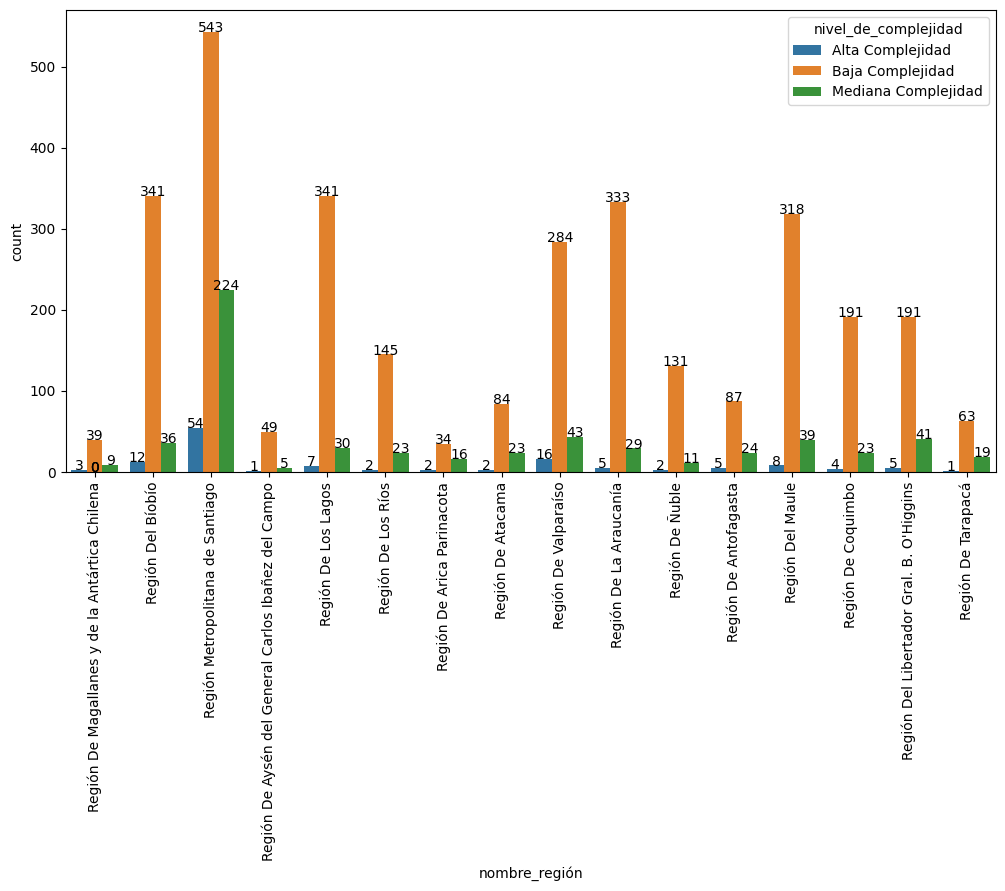

In [247]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="nombre_región", data=df_hospitales, hue="nivel_de_complejidad")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xticks(rotation=90)
plt.show()

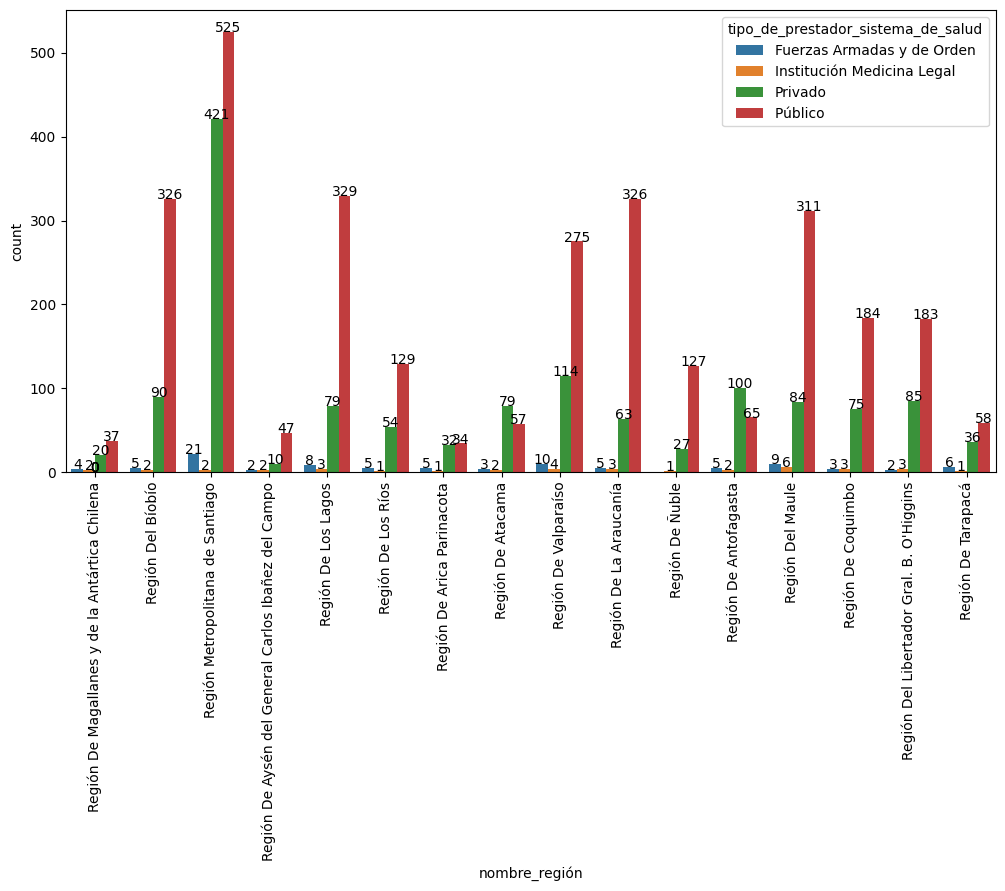

In [226]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="nombre_región", data=df_hospitales, hue="tipo_de_prestador_sistema_de_salud")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xticks(rotation=90)
plt.show()

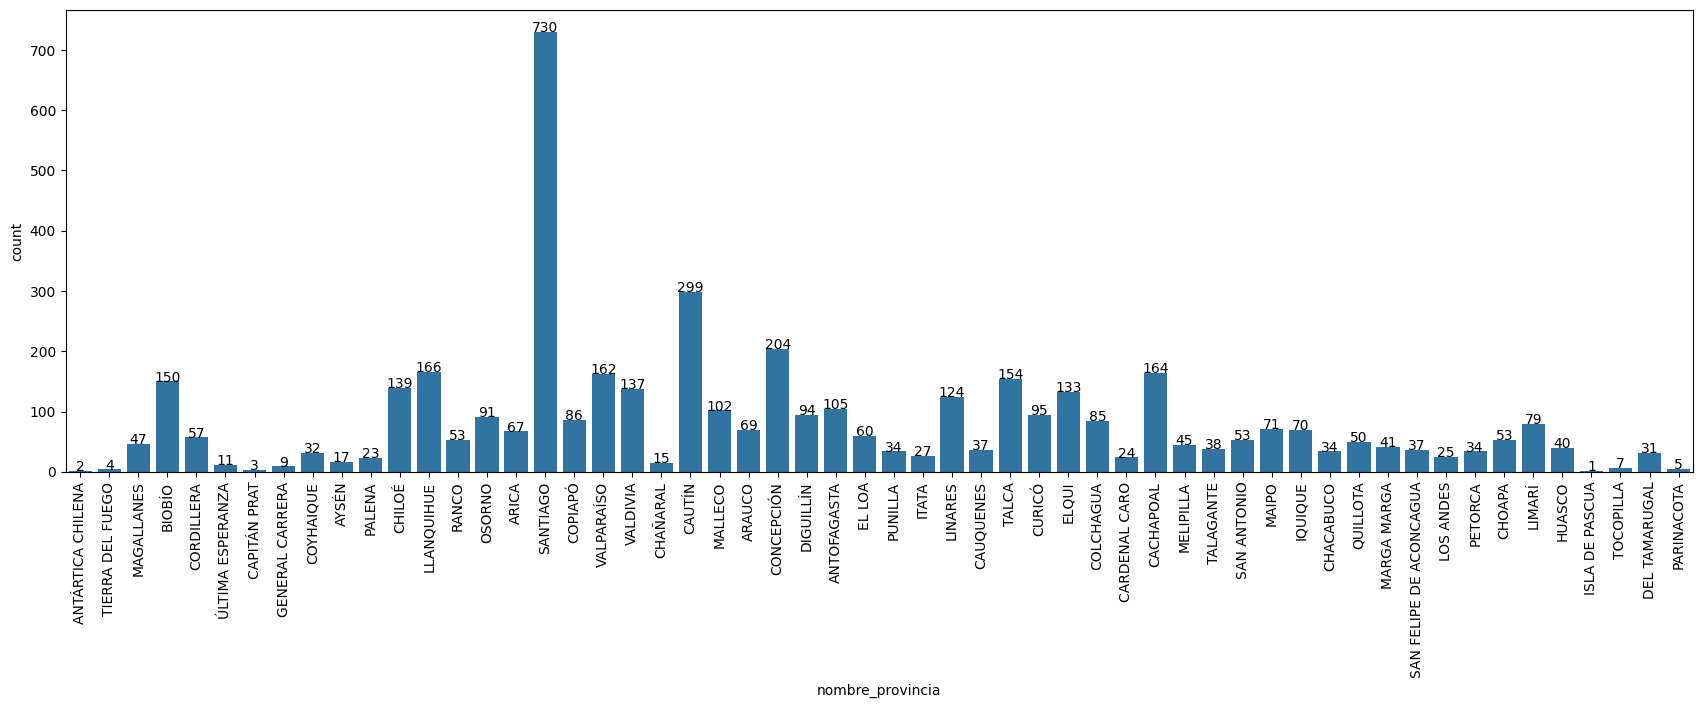

In [389]:
plt.figure(figsize=(21, 6))
ax = sns.countplot(x="nombre_provincia", data=df_hospitales)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xticks(rotation=90)
plt.show()

<Figure size 2100x600 with 0 Axes>

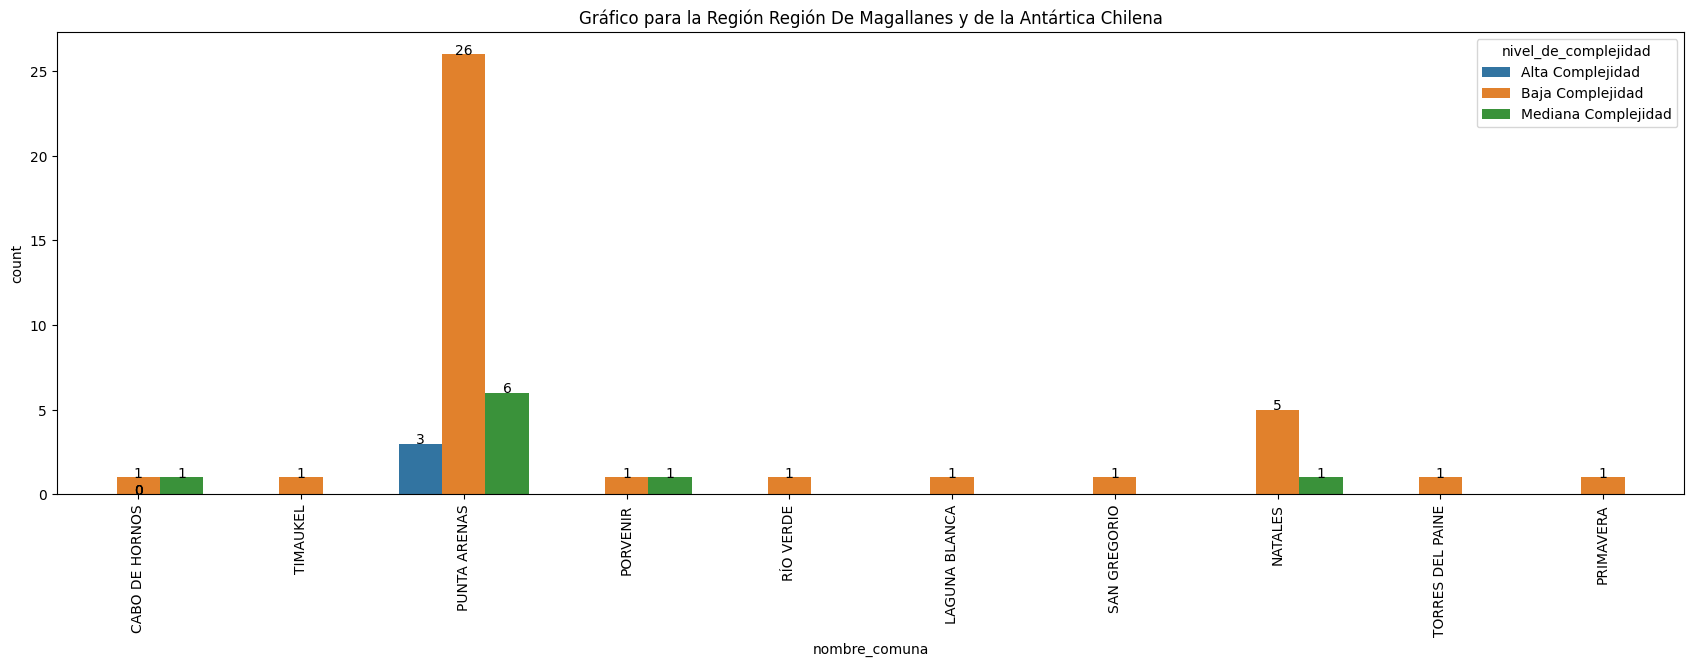

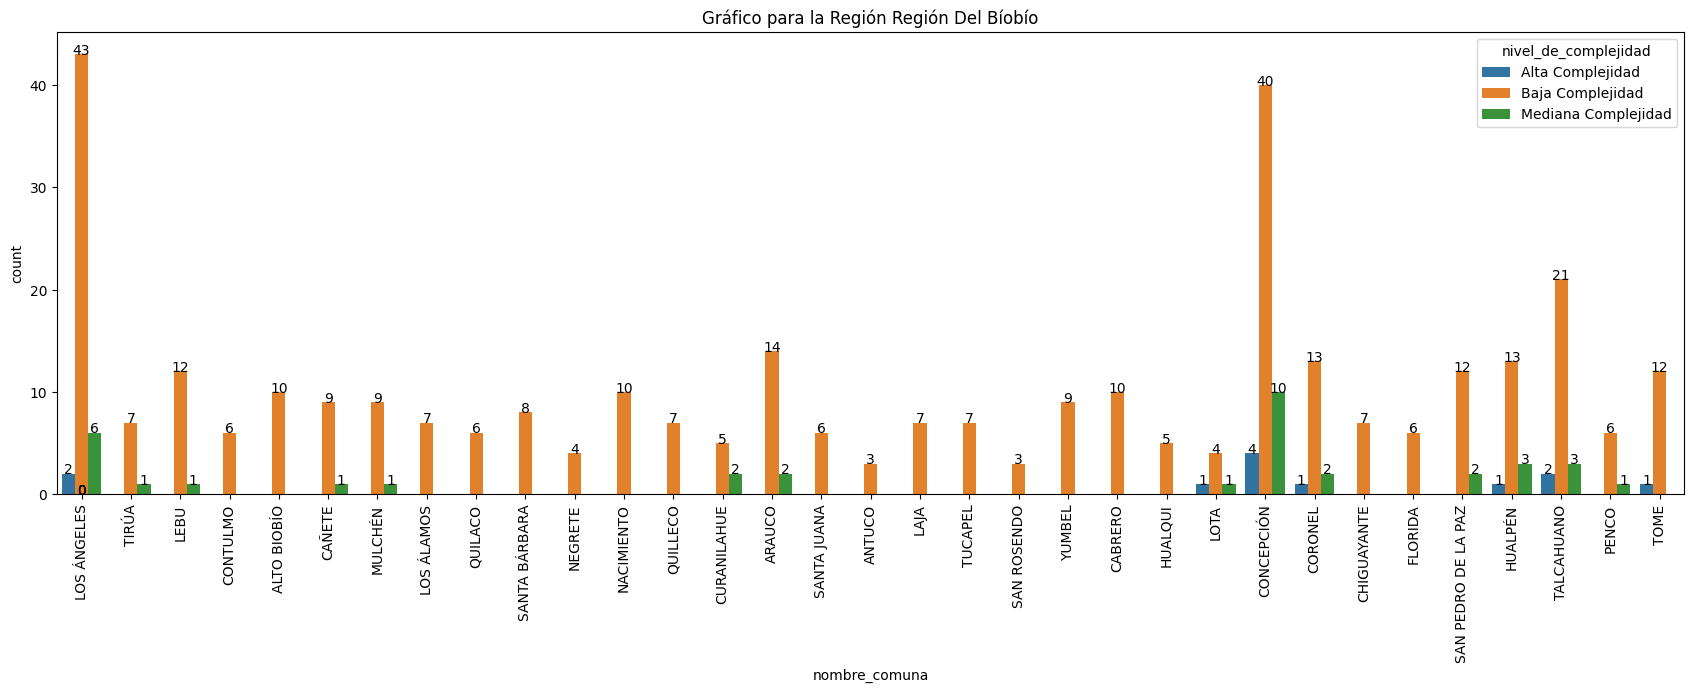

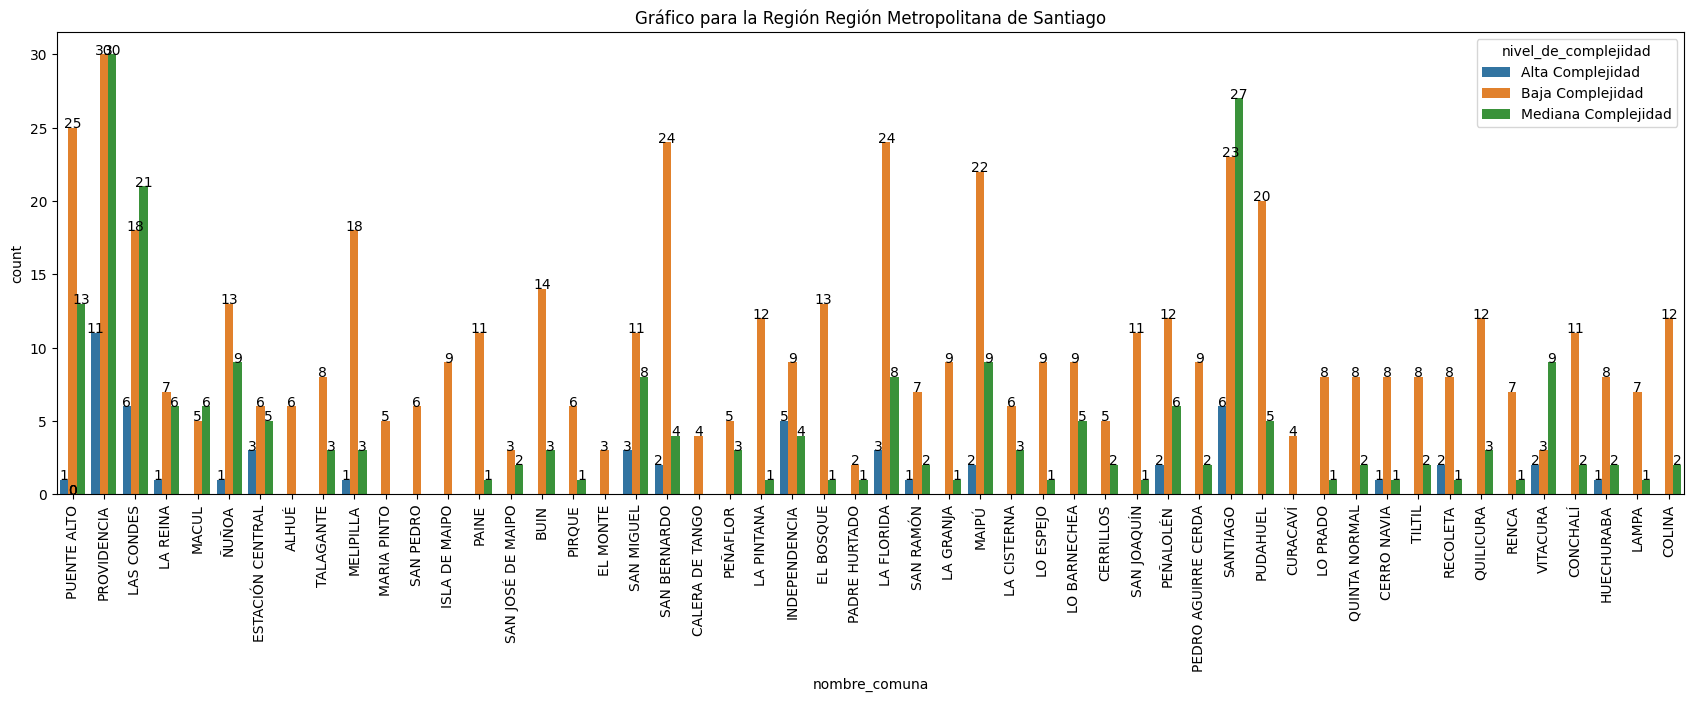

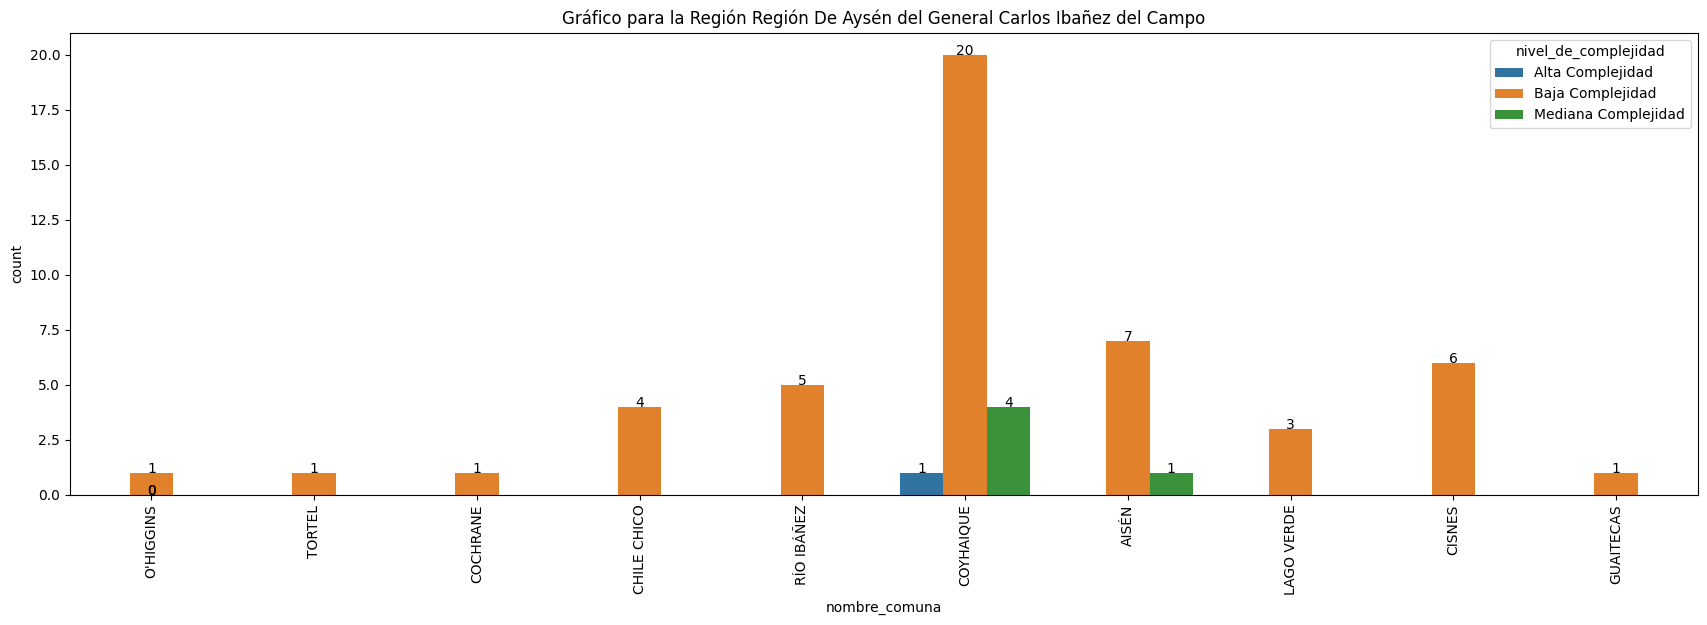

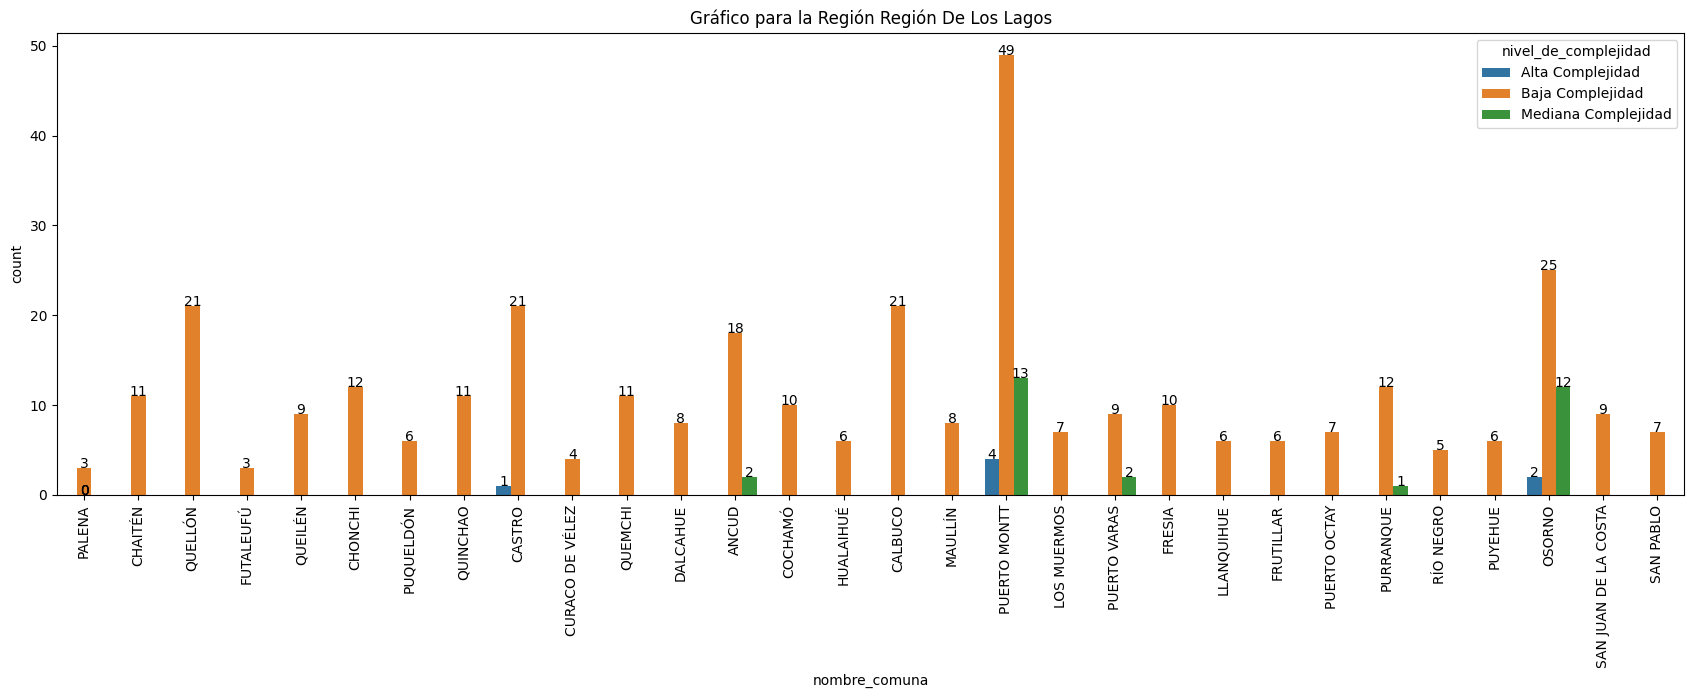

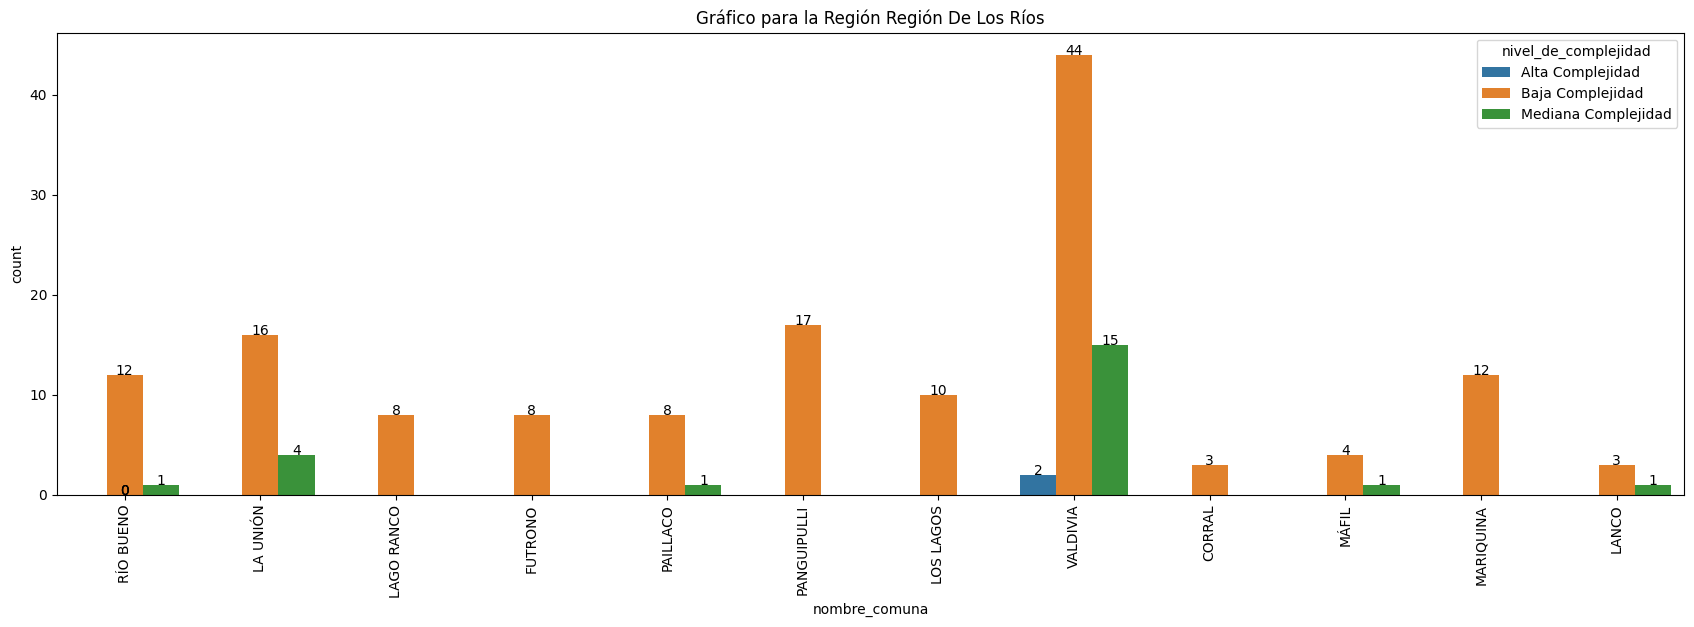

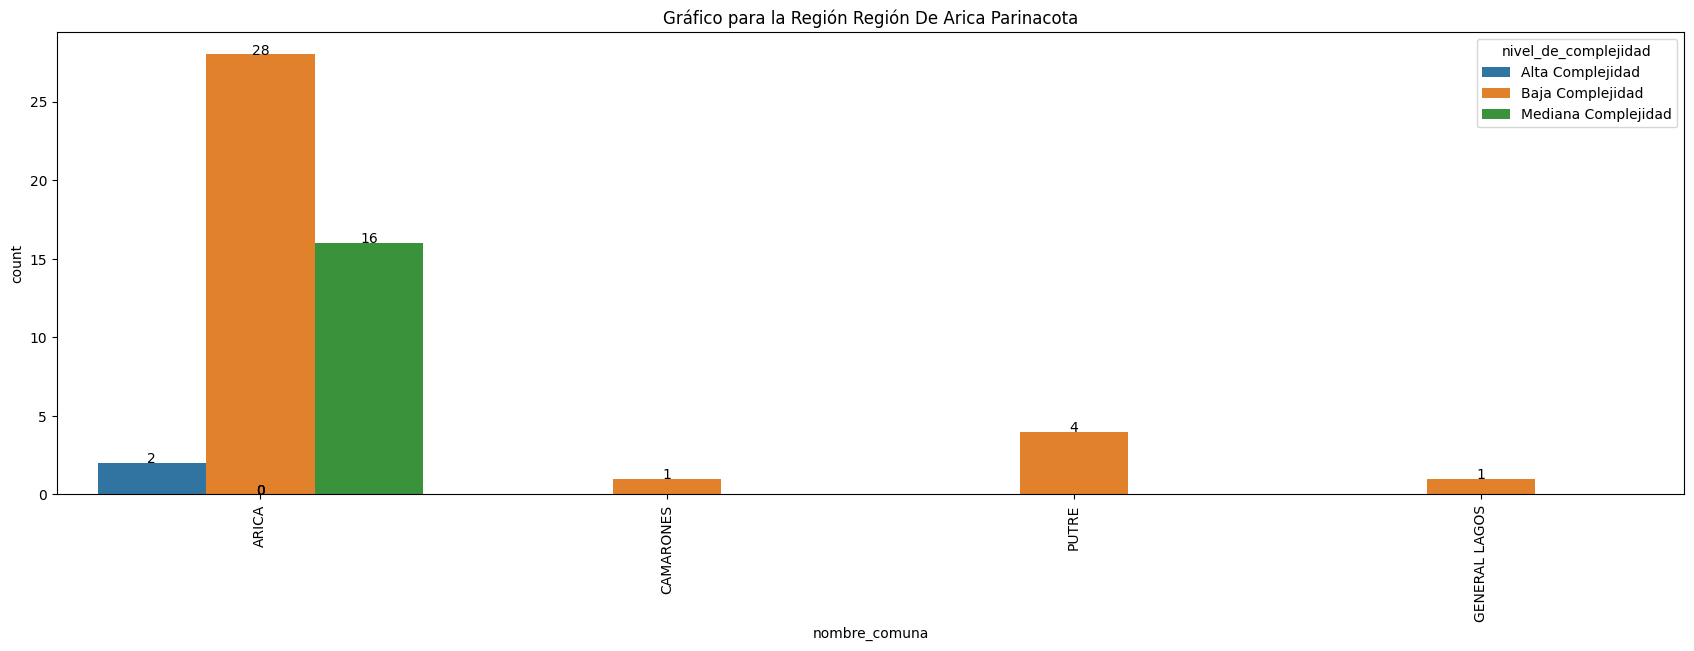

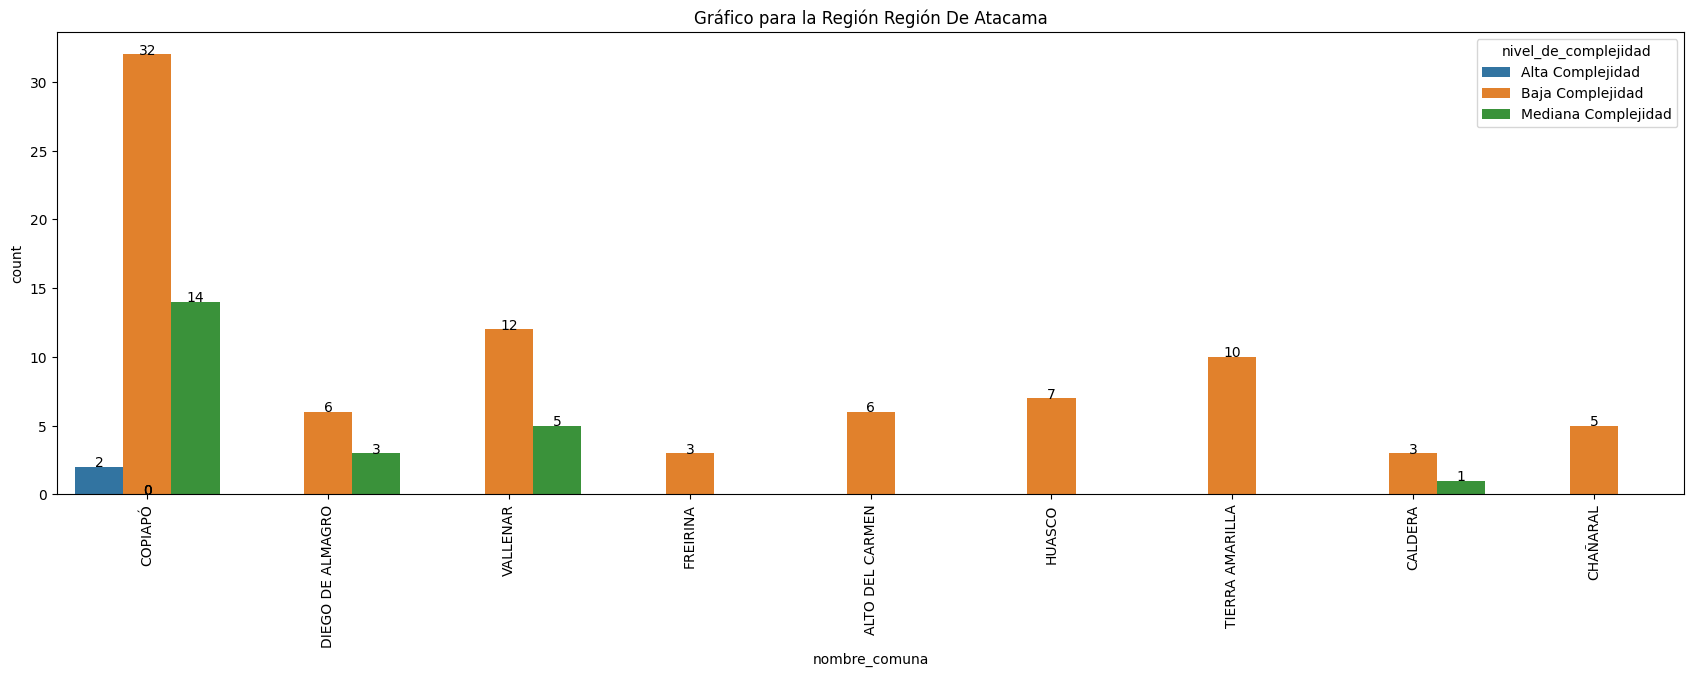

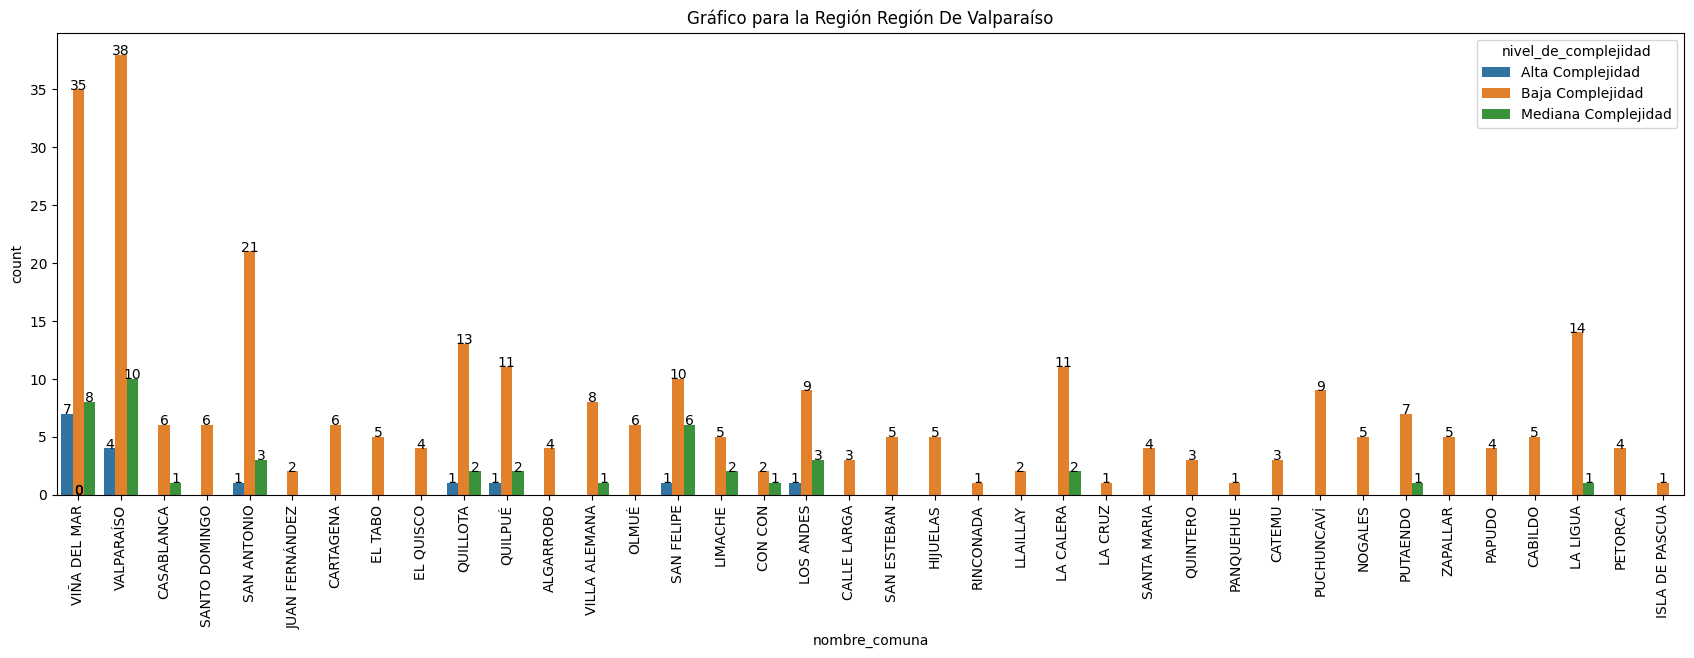

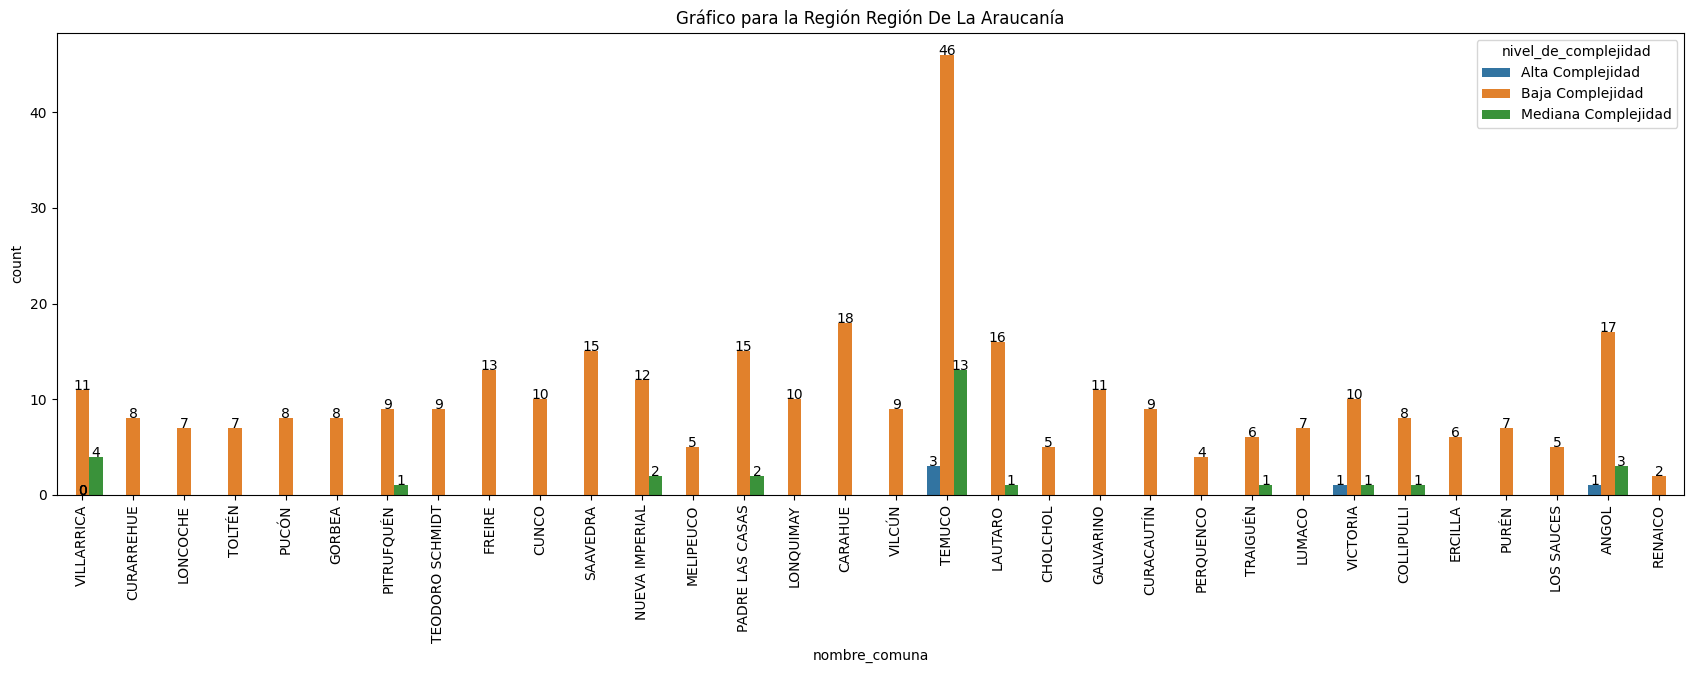

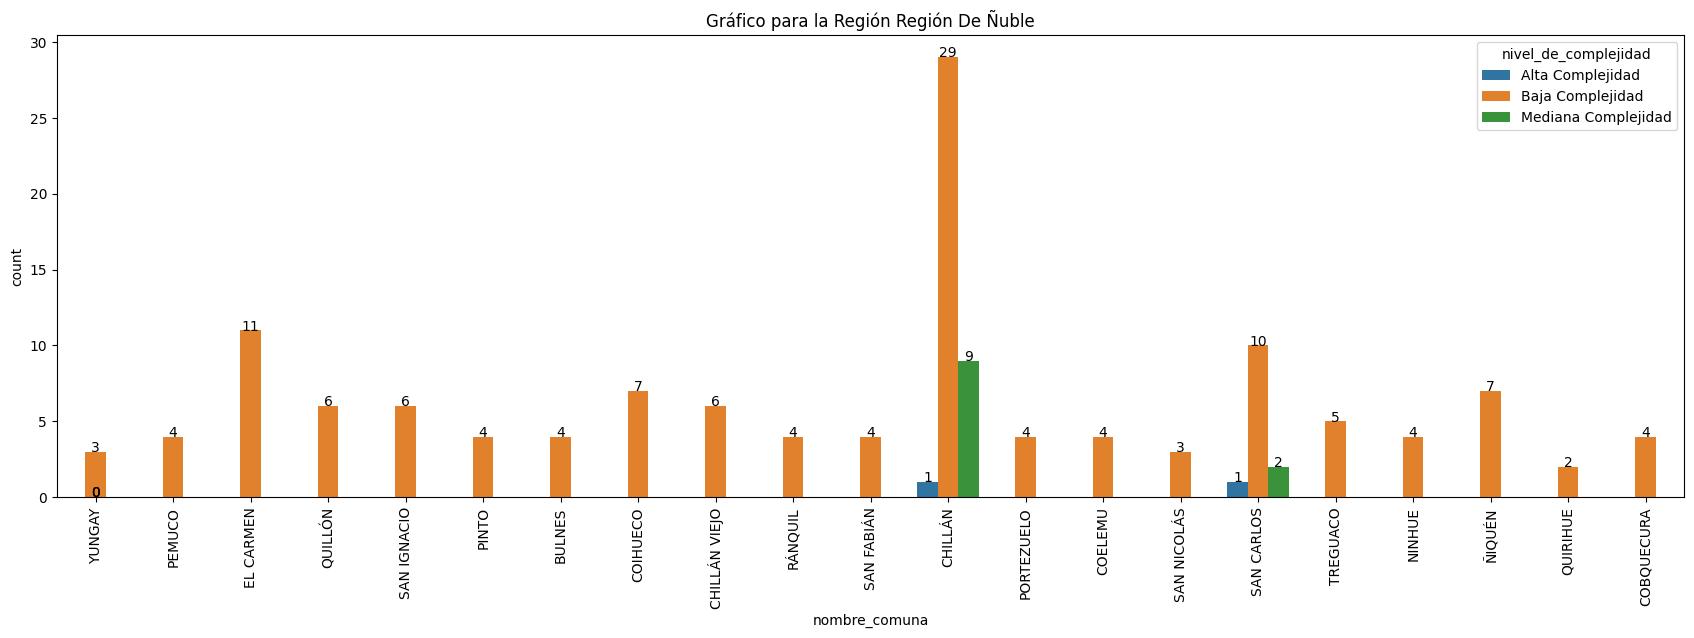

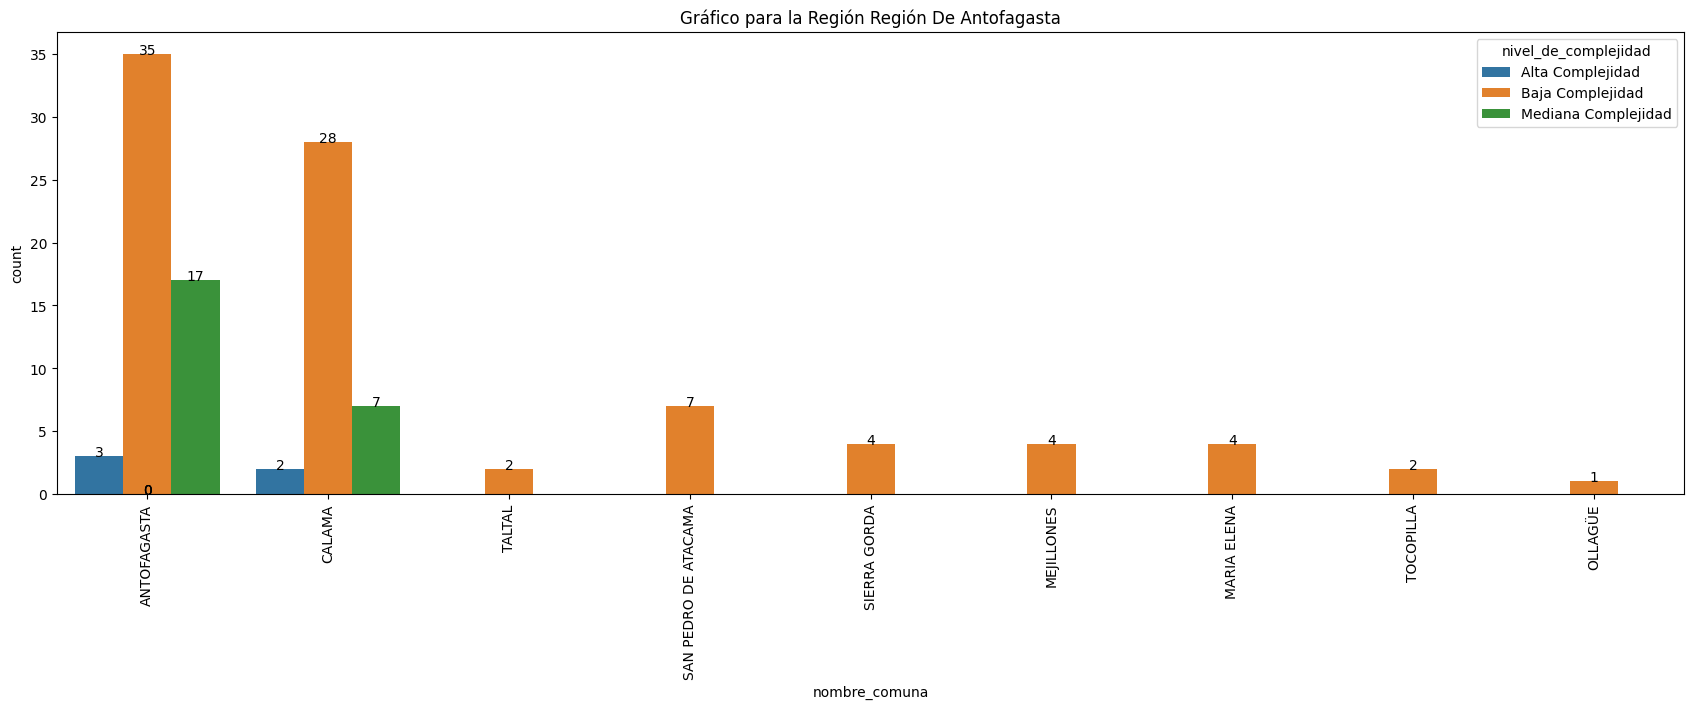

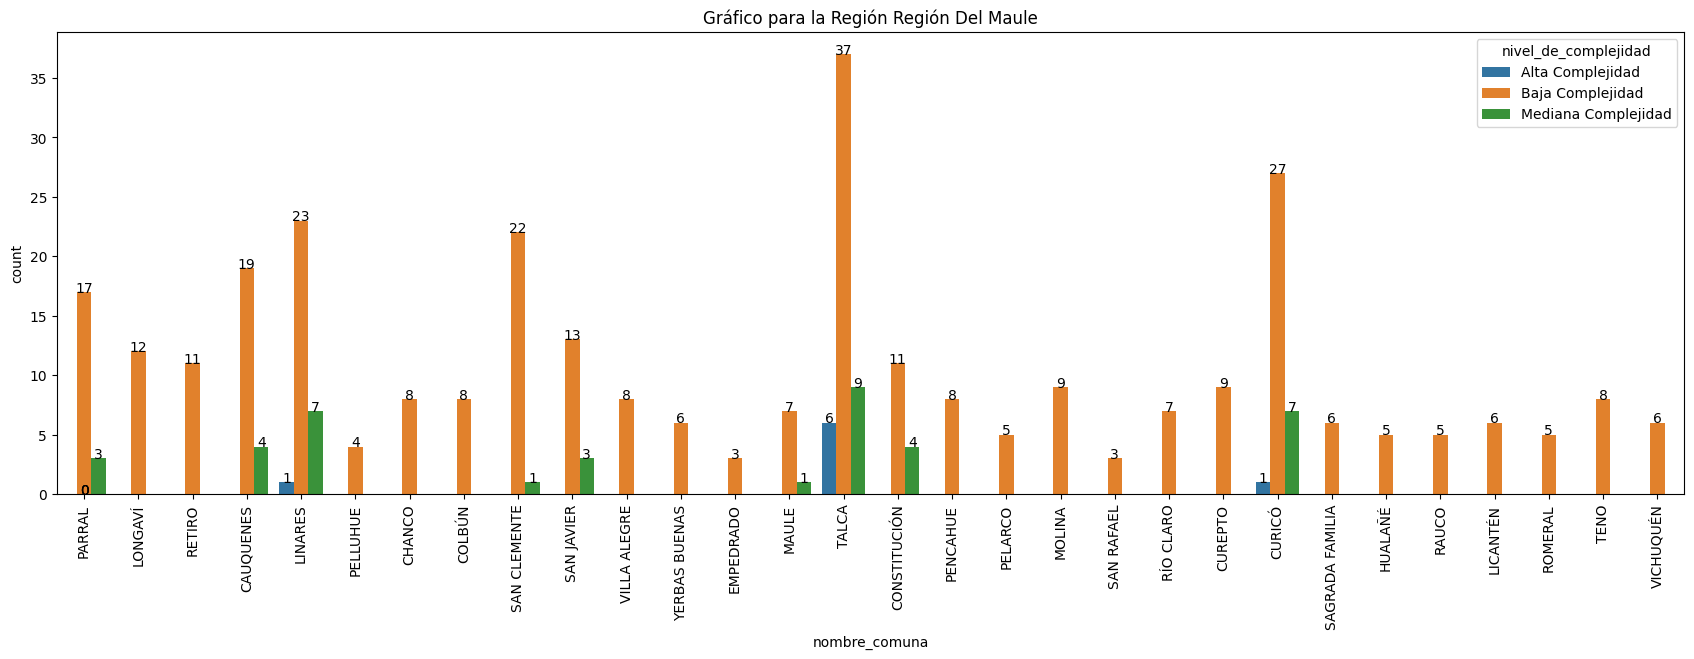

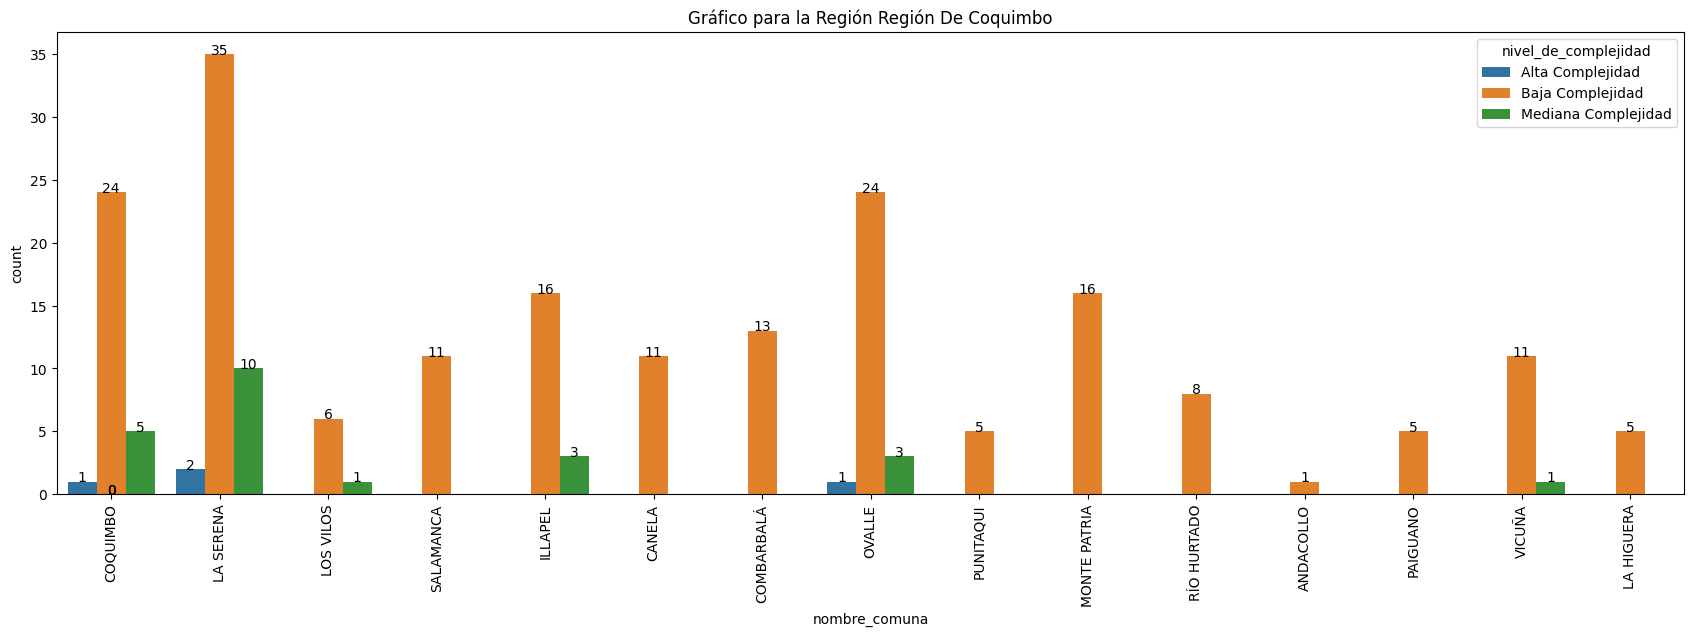

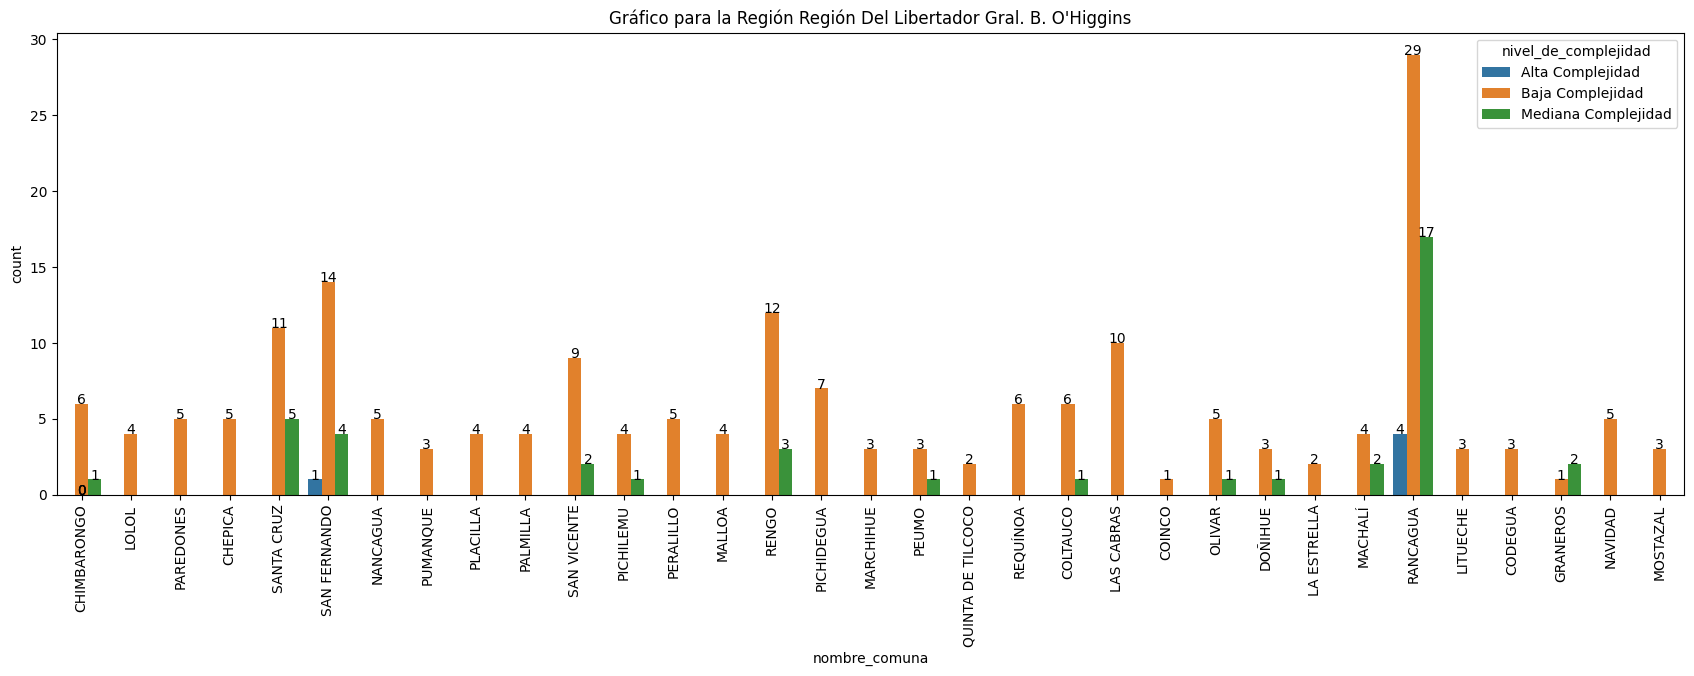

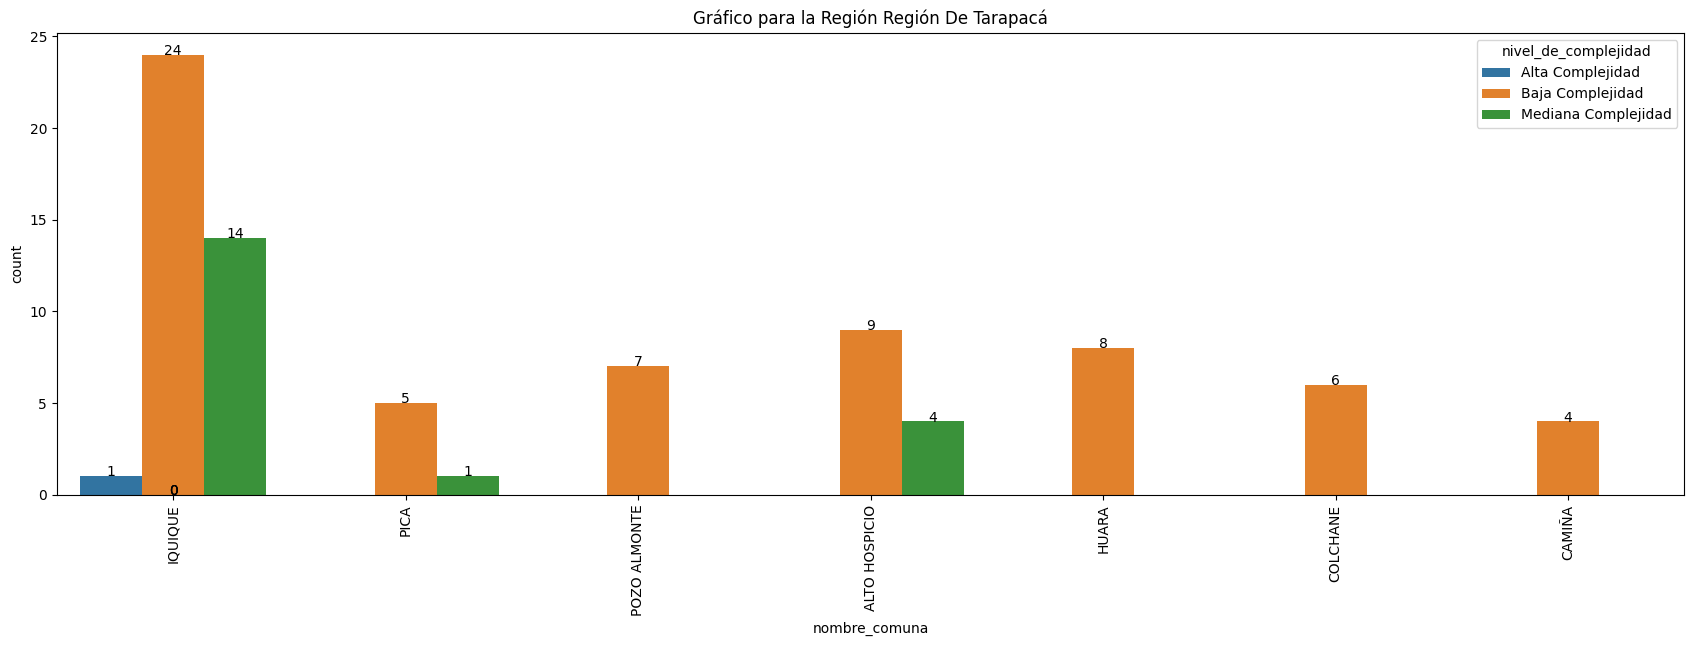

In [391]:
regiones_unicas = df_hospitales['nombre_región'].unique()

# Establece el tamaño de la figura
plt.figure(figsize=(21, 6))

# Itera a través de las regiones y crea un gráfico para cada una
for region in regiones_unicas:
    plt.figure(figsize=(21, 6))
    ax = sns.countplot(x="nombre_comuna", data=df_hospitales[df_hospitales['nombre_región'] == region], hue="nivel_de_complejidad")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    plt.title(f'Gráfico para la Región {region}')
    plt.xticks(rotation=90)
    plt.show()

### Relacion entre cantidad de hospitales y poblacion

#### Relacion cantidad x region

In [148]:
df_hospitales.columns

Index(['código_vigente', 'código_región', 'nombre_región',
       'código_dependencia_jerárquica_(seremi_/_servicio_de_salud)',
       'nombre_dependencia_jerárquica_(seremi_/_servicio_de_salud)',
       'pertenencia_al_snss', 'ámbito_de_funcionamiento', 'nombre_oficial',
       'nivel_de_atención', 'código_comuna', 'nombre_comuna',
       'tiene_servicio_de_urgencia', 'tipo_de_urgencia', 'latitud', 'longitud',
       'tipo_de_prestador_sistema_de_salud', 'nivel_de_complejidad',
       'tipo_de_atención', 'código_provincia', 'nombre_provincia',
       'densidad_hospitales_comuna', 'densidad_hospitales_provincia',
       'densidad_hospitales_region'],
      dtype='object', name=0)

In [146]:
df_poblacion_por_comuna = df_censo[df_censo["nombre_comuna"] != "PAÍS"]
df_poblacion_por_comuna = df_poblacion_por_comuna[df_poblacion_por_comuna["edad"] == "Total Comunal"]
poblacion_por_comuna = df_poblacion_por_comuna[["código_comuna","total"]].reset_index()
poblacion_por_comuna = poblacion_por_comuna.set_index("código_comuna")["total"].to_dict()

In [129]:
hospitales_por_comuna = df_hospitales.pivot_table(df_hospitales, index="código_comuna", aggfunc="size")
df_hospitales["densidad_hospitales_comuna"] = (df_hospitales["código_comuna"].map(hospitales_por_comuna) / df_hospitales["código_comuna"].map(poblacion_por_comuna))


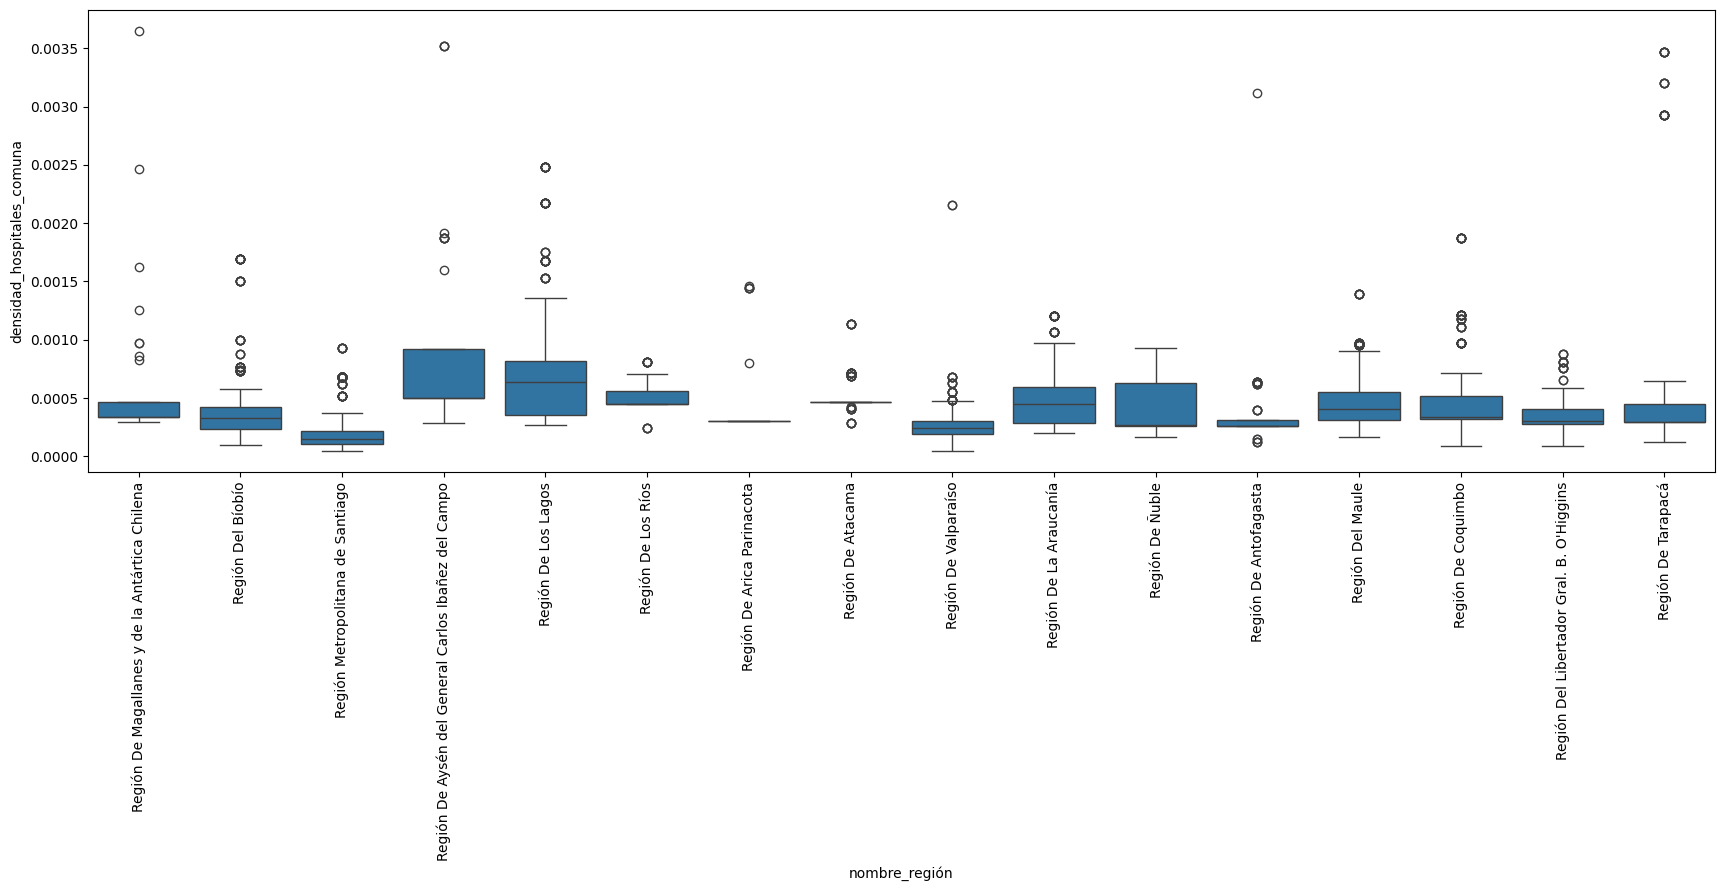

In [150]:
plt.figure(figsize=(21, 6))
sns.boxplot(data=df_hospitales, x="nombre_región", y="densidad_hospitales_comuna")
plt.xticks(rotation=90)
plt.show()

### Tipos de hospitales por comuna

¿Hay comunas sin hospitales segun tipo de complejidad?
¿Hay comunas sin servicios de urgencia?
 **tipo_de_prestador_sistema_de_salud** Sacando los laboratorios, hospitales de fuerzas armadas y SML

In [252]:
df_hospitales.columns

Index(['código_vigente', 'código_región', 'nombre_región',
       'código_dependencia_jerárquica_(seremi_/_servicio_de_salud)',
       'nombre_dependencia_jerárquica_(seremi_/_servicio_de_salud)',
       'pertenencia_al_snss', 'ámbito_de_funcionamiento', 'nombre_oficial',
       'nivel_de_atención', 'código_comuna', 'nombre_comuna',
       'tiene_servicio_de_urgencia', 'tipo_de_urgencia', 'latitud', 'longitud',
       'tipo_de_prestador_sistema_de_salud', 'nivel_de_complejidad',
       'tipo_de_atención', 'código_provincia', 'nombre_provincia'],
      dtype='object', name=0)

In [369]:
df_hospitales["tipo_establecimiento_(unidad)"].unique()

array(['Hospital', 'Posta de Salud Rural (PSR)', 'Clínica Dental',
       'Centro Comunitario de Salud Familiar (CECOSF)',
       'Centro de Salud Mental',
       'Centro Comunitario de Salud Mental  (COSAM)',
       'Servicio de Atención Primaria de Urgencia de Alta Resolutividad (SAR)',
       'Centro de Salud Familiar (CESFAM)', 'Centro de Salud Privado',
       'Laboratorio Clínico', 'Unidad de Salud Funcionarios',
       'Dirección Servicio de Salud',
       'Programa de Reparación y Atención Integral de Salud (PRAIS)',
       'Servicio de Atención Primaria de Urgencia (SAPU)', 'Vacunatorio',
       'Clínica', 'Centro Médico y Dental', 'Servicio Médico Legal',
       'Dispositivo Incorporado por Crisis Sanitaria',
       'Oficina Sanitaria', 'Consultorio General Urbano  (CGU)',
       'Unidad de Procedimientos Móvil',
       'Servicio de Urgencia Rural (SUR)', 'Otro', 'Centro de Diálisis',
       'Centro de Diagnóstico y Terapeútico (CDT)',
       'Hospital de Día Infanto Adolesce

In [354]:
df_hospitales_1 = df_hospitales[(~df_hospitales["tipo_de_prestador_sistema_de_salud"].isin(['Fuerzas Armadas y de Orden', 'Institución Medicina Legal']))]
df_hospitales_1 = df_hospitales_1[(~df_hospitales_1["ámbito_de_funcionamiento"].isin([
    "Hospital",
    "Posta de Salud Rural (PSR)",
    "Centro Comunitario de Salud Familiar (CECOSF)",
    "Servicio de Atención Primaria de Urgencia de Alta Resolutividad (SAR)",
    "Centro de Salud Familiar (CESFAM)",
    "Centro de Salud Privado",
    
]))]
df_hospitales_1["tiene_servicio_de_urgencia"] = df_hospitales_1["tiene_servicio_de_urgencia"].astype("bool")

In [287]:
hospitales_por_comuna = pd.pivot_table(df_hospitales_1, index=["nombre_comuna"],columns=["nivel_de_complejidad"], aggfunc="size", fill_value=0).reset_index()
nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in hospitales_por_comuna.columns}
hospitales_por_comuna.rename(columns=nuevos_nombres, inplace=True)
hospitales_por_comuna

nivel_de_complejidad,nombre_comuna,alta_complejidad,baja_complejidad,mediana_complejidad
0,AISÉN,0,7,1
1,ALGARROBO,0,4,0
2,ALHUÉ,0,6,0
3,ALTO BIOBÍO,0,10,0
4,ALTO DEL CARMEN,0,6,0
...,...,...,...,...
340,YUMBEL,0,9,0
341,YUNGAY,0,3,0
342,ZAPALLAR,0,5,0
343,ÑIQUÉN,0,7,0


In [288]:
print(f"""{len(hospitales_por_comuna[hospitales_por_comuna["alta_complejidad"] == 0])}
{len(hospitales_por_comuna[hospitales_por_comuna["mediana_complejidad"] == 0])}
{len(hospitales_por_comuna[hospitales_por_comuna["baja_complejidad"] == 0])}""")

290
206
0


1) 290 comunas de 346 comunas no tiene hospitales de alta complejidad
2) 206 comunas de 346 comunas no tiene hospitales de alta mediana complejidad

In [280]:
hospitales_por_provincia = pd.pivot_table(df_hospitales_1, index=["nombre_provincia"],columns=["nivel_de_complejidad"], aggfunc="size", fill_value=0).reset_index()
nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in hospitales_por_provincia.columns}
hospitales_por_provincia.rename(columns=nuevos_nombres, inplace=True)
hospitales_por_provincia.head(10)

nivel_de_complejidad,nombre_provincia,alta_complejidad,baja_complejidad,mediana_complejidad
0,ANTOFAGASTA,3,44,15
1,ANTÁRTICA CHILENA,0,1,1
2,ARAUCO,0,60,7
3,ARICA,2,26,15
4,AYSÉN,0,14,1
5,BIOBÍO,2,136,7
6,CACHAPOAL,4,107,29
7,CAPITÁN PRAT,0,3,0
8,CARDENAL CARO,0,22,1
9,CAUQUENES,0,30,4


In [282]:
print(f"""{len(hospitales_por_provincia[hospitales_por_provincia["alta_complejidad"] == 0])}
{len(hospitales_por_provincia[hospitales_por_provincia["mediana_complejidad"] == 0])}
{len(hospitales_por_provincia[hospitales_por_provincia["baja_complejidad"] == 0])}""")

22
8
0


In [283]:
hospitales_por_region = pd.pivot_table(df_hospitales_1, index=["nombre_región"],columns=["nivel_de_complejidad"], aggfunc="size", fill_value=0).reset_index()
nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in hospitales_por_region.columns}
hospitales_por_region.rename(columns=nuevos_nombres, inplace=True)
hospitales_por_region

nivel_de_complejidad,nombre_región,alta_complejidad,baja_complejidad,mediana_complejidad
0,Región De Antofagasta,5,86,22
1,Región De Arica Parinacota,2,31,15
2,Región De Atacama,2,82,22
3,Región De Aysén del General Carlos Ibañez del ...,1,48,4
4,Región De Coquimbo,4,189,22
5,Región De La Araucanía,5,329,28
6,Región De Los Lagos,7,335,28
7,Región De Los Ríos,2,140,23
8,Región De Magallanes y de la Antártica Chilena,2,37,8
9,Región De Tarapacá,1,58,19


In [284]:
print(f"""{len(hospitales_por_region[hospitales_por_region["alta_complejidad"] == 0])}
{len(hospitales_por_region[hospitales_por_region["mediana_complejidad"] == 0])}
{len(hospitales_por_region[hospitales_por_region["baja_complejidad"] == 0])}""")

0
0
0


In [315]:
df_hospitales_1["tiene_servicio_de_urgencia"].info()

<class 'pandas.core.series.Series'>
Index: 4393 entries, 1 to 4526
Series name: tiene_servicio_de_urgencia
Non-Null Count  Dtype
--------------  -----
4393 non-null   bool 
dtypes: bool(1)
memory usage: 38.6 KB


In [316]:
servicio_urgencia_por_comuna = pd.pivot_table(df_hospitales_1, index=["nombre_comuna"],values=["tiene_servicio_de_urgencia"], aggfunc=np.sum, fill_value=0).reset_index()
servicio_urgencia_por_comuna

,nombre_comuna,tiene_servicio_de_urgencia
0,AISÉN,1
1,ALGARROBO,1
2,ALHUÉ,1
3,ALTO BIOBÍO,1
4,ALTO DEL CARMEN,1
...,...,...
340,YUMBEL,2
341,YUNGAY,1
342,ZAPALLAR,3
343,ÑIQUÉN,1


In [320]:
servicio_urgencia_por_comuna[servicio_urgencia_por_comuna["nombre_comuna"] == 0]

,nombre_comuna,tiene_servicio_de_urgencia


No hay ninguna comuna en chile a expecion de la antartica que no tenga un servicio de urgencia

### Laboratorios Chile

In [321]:
df_hospitales_1.columns

Index(['código_vigente', 'código_región', 'nombre_región',
       'código_dependencia_jerárquica_(seremi_/_servicio_de_salud)',
       'nombre_dependencia_jerárquica_(seremi_/_servicio_de_salud)',
       'pertenencia_al_snss', 'ámbito_de_funcionamiento', 'nombre_oficial',
       'nivel_de_atención', 'código_comuna', 'nombre_comuna',
       'tiene_servicio_de_urgencia', 'tipo_de_urgencia', 'latitud', 'longitud',
       'tipo_de_prestador_sistema_de_salud', 'nivel_de_complejidad',
       'tipo_de_atención', 'código_provincia', 'nombre_provincia'],
      dtype='object', name=0)

In [355]:
df_hospitales_1["tipo_establecimiento_(unidad)"].unique()

array(['Hospital', 'Posta de Salud Rural (PSR)', 'Clínica Dental',
       'Centro Comunitario de Salud Familiar (CECOSF)',
       'Centro de Salud Mental',
       'Centro Comunitario de Salud Mental  (COSAM)',
       'Servicio de Atención Primaria de Urgencia de Alta Resolutividad (SAR)',
       'Centro de Salud Familiar (CESFAM)', 'Centro de Salud Privado',
       'Laboratorio Clínico', 'Unidad de Salud Funcionarios',
       'Dirección Servicio de Salud',
       'Programa de Reparación y Atención Integral de Salud (PRAIS)',
       'Servicio de Atención Primaria de Urgencia (SAPU)', 'Vacunatorio',
       'Clínica', 'Centro Médico y Dental',
       'Dispositivo Incorporado por Crisis Sanitaria',
       'Oficina Sanitaria', 'Consultorio General Urbano  (CGU)',
       'Unidad de Procedimientos Móvil',
       'Servicio de Urgencia Rural (SUR)', 'Otro', 'Centro de Diálisis',
       'Centro de Diagnóstico y Terapeútico (CDT)',
       'Hospital de Día Infanto Adolescente',
       'Consultorio

In [359]:
df_laboratorios_1 = df_hospitales[(~df_hospitales["tipo_de_prestador_sistema_de_salud"].isin(['Fuerzas Armadas y de Orden', 'Institución Medicina Legal']))]
df_laboratorios_1 = df_hospitales_1[(df_hospitales_1["tipo_establecimiento_(unidad)"].isin(["Laboratorio Clínico o Dental", "Laboratorio Clínico"]))]
df_laboratorios_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 13 to 4517
Data columns (total 21 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   código_vigente                                              359 non-null    int64   
 1   código_región                                               359 non-null    int64   
 2   nombre_región                                               359 non-null    object  
 3   código_dependencia_jerárquica_(seremi_/_servicio_de_salud)  359 non-null    float64 
 4   nombre_dependencia_jerárquica_(seremi_/_servicio_de_salud)  359 non-null    object  
 5   pertenencia_al_snss                                         359 non-null    bool    
 6   tipo_establecimiento_(unidad)                               359 non-null    object  
 7   ámbito_de_funcionamiento                                    359 non-null    object 

In [362]:
laboratorios_por_comuna = pd.pivot_table(df_laboratorios_1, index=["nombre_comuna"], aggfunc="size", fill_value=0).reset_index()
laboratorios_por_comuna

,nombre_comuna,0
0,ANCUD,4
1,ANGOL,3
2,ANTOFAGASTA,28
3,ARICA,10
4,CABILDO,1
...,...,...
78,VILLA ALEMANA,1
79,VILLARRICA,4
80,VITACURA,1
81,VIÑA DEL MAR,9


Hay 83 comunas en chile con laboratorios de 346

In [364]:
laboratorios_por_provincia = pd.pivot_table(df_laboratorios_1, index=["nombre_provincia"], aggfunc="size", fill_value=0).reset_index()
laboratorios_por_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nombre_provincia  40 non-null     object
 1   0                 40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


39 provincias tienen laboratorios de 54

In [368]:
laboratorios_por_region = pd.pivot_table(df_laboratorios_1, index=["nombre_región"], aggfunc="size", fill_value=0).reset_index()
laboratorios_por_region

,nombre_región,0
0,Región De Antofagasta,39
1,Región De Arica Parinacota,10
2,Región De Atacama,17
3,Región De Aysén del General Carlos Ibañez del ...,2
4,Región De Coquimbo,32
5,Región De La Araucanía,22
6,Región De Los Lagos,30
7,Región De Los Ríos,15
8,Región De Magallanes y de la Antártica Chilena,7
9,Región De Tarapacá,13


Todas las regiones de chile tienen algun laboratorio